# UTN.BA
## Ciencia de Datos
### Grupo 13
#### Analisis de dataset blablalba


In [1]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import datetime as DT
#PCA y Silhouette
from sklearn.decomposition import PCA
from  sklearn.metrics import silhouette_score
#Librerias de Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [2]:
#IMPORTMOS EL DATASET
tp = pd.read_csv(r'Ecommerce ABI Enriched.csv', delimiter=',', low_memory= 'false')

C:\Users\Usuario\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (21,29,47,62,68,74,82,84,91,103,104,112,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### EDA inicial sobre la forma del dataset

In [3]:
#CHEQUEAMOS CUANTAS FILAS Y COLUMNAS TIENE
tp.head(30)
tp.shape

(359388, 141)

In [4]:
#DETALLE DE COLUMNAS
tp.columns

Index(['age', 'birth_date', 'birth_date_day', 'birth_date_month',
       'birth_date_year', 'channel', 'city', 'complement', 'country',
       'created_in',
       ...
       'ideal_glass', 'fermentation', 'style', 'category', 'subcategory',
       'country_of_production', 'is_abi', 'source_schema', 'food_pairing_tip',
       'time.1'],
      dtype='object', length=141)

In [5]:
#Vemos que columnas tienen nulls
tp.isnull().sum()

age                            359388
birth_date                     359388
birth_date_day                 359388
birth_date_month               359388
birth_date_year                359388
channel                        359388
city                           359388
complement                     359388
country                             0
created_in                          0
creation_brand                      0
district                       359388
document_id                    359388
document_id_unify              359388
email                          359388
emails                         359388
facebook_id                    359388
first_name                     359388
full_name                      359388
gender                         359388
id                                  0
id_1                           133049
identification_number          359388
identification_number_unify    359388
is_employee                    359388
last_name                      359388
mobile_numbe

## Conclusion: Tenemos un dataset con casi 360000 samples, pero gran parte de ellas estan en null o parecen ser features repetidas

In [6]:
#Borramos todas las columnas que no sirven
tpf1 = tp.drop(['age','birth_date','birth_date_day','birth_date_month','birth_date_year','created_in','channel','city','complement','district','document_id','document_id_unify','email','emails','facebook_id','first_name','full_name','country_of_production',
       'food_pairing_tip','width','time', 'ideal_glass','table_origin','td_id', 'fermentation','origin_score',
       'style','ideal_temperature', 'local_subcategory', 'is_bundle', 'volume','source_system',
       'abv', 'units_per_sku','length','creation_brand', 'country_of_origin','height','business_name',
       'is_active','identification_number','source','title','td_id','system','currency',
       'identification_number_unify', 'is_employee','last_name','product_spk','business_spk',
       'mobile_number','neighborhood','number','phone_number','state','street','td_global_id',
       'time_creation', 'twitter_id','department','item_id', 'order_status_type','uniqueid', 'zipcode', 'cuit_cuil',
       'dni', 'id_2', 'id_3','gender', 'id_1','unit_discount_local','td_id.1','customer_first_order_period','customer_first_order_year',
       'unit_delivery_cost_local', 'is_incomplete', 'coupon_code','unit_tax_usd','unit_tax_local',
       'order_rating','unit_subtotal_charged_usd','delivery_type',
       'unit_subtotal_charged_local', 'unit_delivery_cost_usd', 'order_type',
       'unit_product_cost_local','unit_margin_usd','product_url','is_test','unit_product_cost_usd',
       'unit_margin_local', 'unit_volume','description', 'body', 'local_category', 'date_retired',
       'is_returnable_glass_bottle', 'ean', 'row_updated_at', 'brand_category','elegible_discount_spk','delivery_address_spk','discount_name','operator_nk','discount_spk','image_url','upc','opt_in','id_4','weight','source_schema','is_abi','time.1','product_nk'], axis = 1)

In [7]:
#Vemos cuantas filas y columnas quedaron
tpf1.shape

(359388, 27)

In [8]:
#Vemos cuantos registros tienen nulls
tpf1.isnull().sum()

country                            0
id                                 0
unit_discount_usd                  0
customer_first_order_date          0
unit_gross_revenue_local           0
unit_delivery_charged_usd          0
unit_net_revenue_usd               0
order_date                         0
order_status                       0
customer_spk                       0
unit_price_charged_local           0
unit_gross_revenue_usd             0
source_system_order_id             0
unit_delivery_charged_local        0
rate_local_do_usd                  0
quantity                           0
unit_price_charged_usd             0
unit_net_revenue_local             0
order_days_after_first_order       0
order_time                         0
row_created_at                     0
sku                              616
brand                           2520
date_created                    2333
name                               0
category                        4954
subcategory                     4954
d

In [9]:
#Separamos la columa order_date en año,mes y dia
tpf1.order_date = pd.to_datetime(tpf1.order_date)
tpf1['year'] = tpf1.order_date.dt.year 
tpf1['month'] = tpf1.order_date.dt.month 
tpf1['day'] = tpf1.order_date.dt.day 
#Pasamos el order_time a datetime
tpf1['order_time'] =  pd.to_datetime(tpf1['order_time'], format='%H:%M:%S')
tpf1.head()

,country,id,unit_discount_usd,customer_first_order_date,unit_gross_revenue_local,unit_delivery_charged_usd,unit_net_revenue_usd,order_date,order_status,customer_spk,...,row_created_at,sku,brand,date_created,name,category,subcategory,year,month,day
0,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.0000,2018-04-18,884.6936,0.1707,1.3421,2018-04-18,canceled,cl_casadelacerveza;ded0f554dbb2f3381acf862ad69...,...,2018-08-20 05:55:44.844529,69,Goose Island,2018-04-05 10:45:09.088888,Pack Degustación Goose Island + Vaso,unknown,unknown,2018,4,18
1,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.2652,2018-04-18,722.7899,0.1708,1.0965,2018-04-18,invoiced,cl_casadelacerveza;ded0f554dbb2f3381acf862ad69...,...,2018-08-20 05:55:44.844529,69,Goose Island,2018-04-05 10:45:09.088888,Pack Degustación Goose Island + Vaso,unknown,unknown,2018,4,18
2,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.0000,2018-04-18,1129.6857,0.2179,1.7138,2018-04-18,canceled,cl_casadelacerveza;ded0f554dbb2f3381acf862ad69...,...,2018-06-08 05:39:56.779021,50,Lowenbrau,2018-04-05 10:45:36.799491,Cerveza Lowenbrau Oktoberfest Botella,Beer,unknown,2018,4,18
3,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.3382,2018-04-18,921.6156,0.2178,1.3981,2018-04-18,invoiced,cl_casadelacerveza;ded0f554dbb2f3381acf862ad69...,...,2018-06-08 05:39:56.779021,50,Lowenbrau,2018-04-05 10:45:36.799491,Cerveza Lowenbrau Oktoberfest Botella,Beer,unknown,2018,4,18
4,Chile,"[""cl_casadelacerveza;ded0f554dbb2f3381acf862ad...",0.0000,2018-04-18,1046.8875,0.2019,1.5882,2018-04-18,canceled,cl_casadelacerveza;ded0f554dbb2f3381acf862ad69...,...,2018-08-20 07:30:23.707858,449,unknown,2018-05-21 13:00:01.212182,Cerveza Lowenbrau Original Botella,unknown,unknown,2018,4,18


In [10]:
# calculo el percentil 99.9 (se hizo tanteo previo) de la columna "quantity"
perc_999 = tpf1['quantity'].quantile(0.999)
perc_999

48.0

In [11]:
#quitamos los registros que tengan mas de 48 en quantity
tpf2 = tpf1.loc[tpf1['quantity']<perc_999]
perc_999 = tpf2['quantity'].quantile(0.999)

In [12]:
perc_999

28.0

In [13]:
#Filtramos el dataset por country = Argentina
tp_arg = tpf2.loc[tpf2['country'].isin(['Argentina'])]
tp_arg.country.unique()

array(['Argentina'], dtype=object)

In [14]:
#Sabemos que el dataset no esta completo para los años 2016 y 2018, por lo que filtramos el dataset por el año 2017
tp_arg_2017 = tp_arg.loc[tp_arg['year'].isin(['2017'])]
tp_arg_2017.year.unique()

array([2017], dtype=int64)

In [15]:
##Limpiamos mas columnas
tp_arg_2017 = tp_arg_2017.drop(tp_arg_2017.loc[tp_arg['subcategory'].isnull()].index)
tp_arg_2017 = tp_arg_2017.drop(tp_arg_2017.loc[tp_arg['sku'].isnull()].index)
#Cambiamos Grupo Modelo por Corona
tp_arg_2017.brand = tp_arg_2017.brand.replace(to_replace = ['Grupo Modelo'],value = 'Corona')
tp_h = tp_arg_2017.drop(['unit_gross_revenue_usd','source_system_order_id', 'rate_local_do_usd', 'order_days_after_first_order', 'unit_price_charged_usd', 'customer_first_order_date', 'unit_delivery_charged_usd', 'unit_net_revenue_usd', 'row_created_at', 'sku', 'date_created'], axis=1)
tp_h.head(5)

,country,id,unit_discount_usd,unit_gross_revenue_local,order_date,order_status,customer_spk,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,order_time,brand,name,category,subcategory,year,month,day
17162,Argentina,"[""ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38...",0.0000,1030.0000,2017-09-20,paid,ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38b4...,890.0,140.0000,1,788.0530,1900-01-01 18:19:39,Corona,Pack Corona Experience,Beer,Others,2017,9,20
17165,Argentina,"[""ar_bevybar;41434b744330c691cf83b70da3fa080c8...",0.0000,631.0000,2017-06-13,paid,ar_bevybar;41434b744330c691cf83b70da3fa080c85a...,432.0,199.0000,1,493.6944,1900-01-01 12:56:23,Patagonia Brewing Co.,Pack de Cervezas y Vasos Patagonia,Mixed Pack,unknown,2017,6,13
17174,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",2.7181,234.6542,2017-02-28,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,265.0,14.7222,1,176.2018,1900-01-01 23:33:23,Peñón del Águila,Cerveza Peñón del Águila Kölsch,Beer,unknown,2017,2,28
17175,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",1.8052,155.8458,2017-02-28,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,44.0,9.7778,4,117.0246,1900-01-01 23:33:23,Peñón del Águila,Cerveza Peñón del Águila Kölsch,Beer,unknown,2017,2,28
17176,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",9.0465,910.0000,2017-07-30,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,1011.0,49.0000,1,698.5160,1900-01-01 17:15:42,BevyBar,Pack Degustación del Mes de Julio XL,Mixed Pack,unknown,2017,7,30


In [16]:
##Chequeamos que no quedan nulls
tp_h.isnull().sum()

country                        0
id                             0
unit_discount_usd              0
unit_gross_revenue_local       0
order_date                     0
order_status                   0
customer_spk                   0
unit_price_charged_local       0
unit_delivery_charged_local    0
quantity                       0
unit_net_revenue_local         0
order_time                     0
brand                          0
name                           0
category                       0
subcategory                    0
year                           0
month                          0
day                            0
dtype: int64

In [17]:
#Vemos la cantidad de veces que aparece cada id. Esto nos dirá rápidamente si hay outliers.
tp_h.id.value_counts()
#Observamos que una id realizó 4927 compras, por lo cual procederemos a extraerla.

["ar_bevybar;85a4541be6230293ef4f6d91b0df26263a8ae8eb520f1683ee8da148ec4bccb8"]    4927
["ar_bevybar;6ac0a6038ac280d24e192c75507523542b3b808616c9b496bced2ebc9bf8f682"]     124
["ar_bevybar;0cf248d7670517788205b21a00b3b95a7613721f6a2142f2a71ff936505154f7"]     123
["ar_bevybar;cb6520ac6ee6ac4a2489802686b342445ccb27c608ea3e31fdbac5eb7b26e7d2"]     113
["ar_bevybar;0aa3aebd3809cbcccd03f9350a135291a4cc6cf0e91531b1c2ad082eed729957"]     102
["ar_bevybar;2fd602be49f597b8296eaf4ab7db768cadff4daef7acdc2ddb8d2fe87d6f2e67"]      96
["ar_bevybar;c35e3b1de2ac34c7cc8189a4be05376b523ccfc022d3c80ebc52afaddcf8a558"]      83
["ar_bevybar;c68b56ab8a20714b2adc9b2ea0347d85377ce00ef06f7241d6833001601d9e3d"]      82
["ar_bevybar;2432fc9e5b1b7dc5b0b6798ebc1b31ea5b565d43323a54949788a25b0e3ba2c3"]      82
["ar_bevybar;1774a2022f78ca3718e09203117925498c207de6a6463491fea330ab259c8d50"]      80
["ar_bevybar;ce8c091f340155e1fe5fd9445cd2bcc873837a0ce2639b86b1cbc217e82296aa"]      78
["ar_bevybar;2fafe310067059488b1

In [18]:
#Quitamos el outlier id con 4943 compras en ambos datasets
tp_h.drop(tp_h.loc[tp_h['id']=='["ar_bevybar;85a4541be6230293ef4f6d91b0df26263a8ae8eb520f1683ee8da148ec4bccb8"]'].index, inplace=True)
tp_arg_2017.drop(tp_arg_2017.loc[tp_arg_2017['id']=='["ar_bevybar;85a4541be6230293ef4f6d91b0df26263a8ae8eb520f1683ee8da148ec4bccb8"]'].index, inplace=True)

In [19]:
tp_arg_2017.id.value_counts()

["ar_bevybar;6ac0a6038ac280d24e192c75507523542b3b808616c9b496bced2ebc9bf8f682"]    124
["ar_bevybar;0cf248d7670517788205b21a00b3b95a7613721f6a2142f2a71ff936505154f7"]    123
["ar_bevybar;cb6520ac6ee6ac4a2489802686b342445ccb27c608ea3e31fdbac5eb7b26e7d2"]    113
["ar_bevybar;0aa3aebd3809cbcccd03f9350a135291a4cc6cf0e91531b1c2ad082eed729957"]    102
["ar_bevybar;2fd602be49f597b8296eaf4ab7db768cadff4daef7acdc2ddb8d2fe87d6f2e67"]     96
["ar_bevybar;c35e3b1de2ac34c7cc8189a4be05376b523ccfc022d3c80ebc52afaddcf8a558"]     83
["ar_bevybar;2432fc9e5b1b7dc5b0b6798ebc1b31ea5b565d43323a54949788a25b0e3ba2c3"]     82
["ar_bevybar;c68b56ab8a20714b2adc9b2ea0347d85377ce00ef06f7241d6833001601d9e3d"]     82
["ar_bevybar;1774a2022f78ca3718e09203117925498c207de6a6463491fea330ab259c8d50"]     80
["ar_bevybar;2fafe310067059488b1611913e6fa67222718e3305eb89f6f8a770dcf54d6c84"]     78
["ar_bevybar;ce8c091f340155e1fe5fd9445cd2bcc873837a0ce2639b86b1cbc217e82296aa"]     78
["ar_bevybar;01aa381f28d5e94ccaa562245f404e

In [20]:
##EDA Productos mas vendidos
tp_h.name.value_counts()

Pack Conservadora Corona                                       2623
Copas Stella Artois 330ml - Pack 6 unidades                    2413
Copa Patagonia 400ml - Pack 6 unidades                         1736
Pack de 6 Copas de Edición Limitada                            1598
Pack de 3 Copas Edición Limitada                               1355
Pack de Cervezas Europeas                                      1260
Pack Corona Experience                                         1180
Pack de Cervezas y Vasos Patagonia                             1142
Copa Edición Limitada Stella Artois Brasil                     1022
Copa Edición Limitada Stella Artois Uganda                      998
Pack de Cervezas y Chopp Patagonia Octubrefest                  944
Destapador Stella Artois                                        762
Cerveza Hoegaarden White                                        709
Copa Edición Limitada Stella Artois Camboya                     650
Copas Stella Artois 250ml - Pack 6 unidades     

In [21]:
tp_h.head()

,country,id,unit_discount_usd,unit_gross_revenue_local,order_date,order_status,customer_spk,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,order_time,brand,name,category,subcategory,year,month,day
17162,Argentina,"[""ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38...",0.0000,1030.0000,2017-09-20,paid,ar_bevybar;8b3eb4b88a85ba3eeb60dd24686995c38b4...,890.0,140.0000,1,788.0530,1900-01-01 18:19:39,Corona,Pack Corona Experience,Beer,Others,2017,9,20
17165,Argentina,"[""ar_bevybar;41434b744330c691cf83b70da3fa080c8...",0.0000,631.0000,2017-06-13,paid,ar_bevybar;41434b744330c691cf83b70da3fa080c85a...,432.0,199.0000,1,493.6944,1900-01-01 12:56:23,Patagonia Brewing Co.,Pack de Cervezas y Vasos Patagonia,Mixed Pack,unknown,2017,6,13
17174,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",2.7181,234.6542,2017-02-28,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,265.0,14.7222,1,176.2018,1900-01-01 23:33:23,Peñón del Águila,Cerveza Peñón del Águila Kölsch,Beer,unknown,2017,2,28
17175,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",1.8052,155.8458,2017-02-28,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,44.0,9.7778,4,117.0246,1900-01-01 23:33:23,Peñón del Águila,Cerveza Peñón del Águila Kölsch,Beer,unknown,2017,2,28
17176,Argentina,"[""ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74...",9.0465,910.0000,2017-07-30,paid,ar_bevybar;2aedfe0c0b63ee0da640463d4b0a09f74f9...,1011.0,49.0000,1,698.5160,1900-01-01 17:15:42,BevyBar,Pack Degustación del Mes de Julio XL,Mixed Pack,unknown,2017,7,30


In [22]:
tp_h.brand.unique()

array(['Corona', 'Patagonia Brewing Co.', 'Peñón del Águila', 'BevyBar',
       'Stella Artois', 'Bass Brewery', 'Leffe', "Fuller's",
       'Spaten-Franziskaner-Bräu', 'Karlsberg Brauerei',
       'Les Brasseurs de Gayant\xa0', 'Barba Roja', 'Coopers Brewery',
       'Brouwerij Van Steenberge', 'Hoegaarden', 'Backus y Johnston',
       'Löwenbräu', 'Brauerei Beck & Co',
       'Fabricas Nacionales De Cerveza', 'Czechvar',
       'De La Vaca Tranquila Cervezas Artesanales',
       'Paulaner Brauerei München', 'Duvel Moortgat', 'Zillertal',
       'Baltika Breweries', 'Hofbräu München', 'Chimay',
       'Kronenbourg 1664', 'Kulmbacher Brauerei AG', 'Grimbergen',
       'Maredsous', 'Tsingtao', 'Cervecería y Maltería Quilmes',
       'Fábricas Nacionales De Cerveza', 'Anchor Brewing Company',
       'Cervecería Antares', 'Condeminal', 'Brasserie de Silly',
       'SAB Miller', 'Bodega Budeguer', 'Shock Top', 'Belsh',
       'OETTINGER Brauerei GmbH', 'Erdinger Weissbräu', 'Águila Real',


In [23]:
#Cambio todos los brands de importadas por 'importadas'
tp_arg_2017.brand = tp_arg_2017.brand.replace(to_replace = ['Cervecería Antares','Flensburger Brauerei','Fábricas Nacionales De Cerveza', 'Fabricas Nacionales De Cerveza', 'Cerveceria Artesanal El Bolson', 'Peñón del Águila', 'Leffe', 'Spaten-Franziskaner-Bräu', 'BBC', 'Cervecería Artesanal El Bolson',
       'Anchor Brewing Company', 'Bass Brewery', 'Hofbräu München',
       'Adnams', "Fuller's", 'Karlsberg Brauerei',
       'Les Brasseurs de Gayant\xa0',
       'Brouwerij Van Steenberge', 'Hoegaarden',
       'Fuegian Beverage Company',
       'De La Vaca Tranquila Cervezas Artesanales', 'Tsingtao',
       'Löwenbräu', 'unknown', 'Barba Roja', 'Coopers Brewery',
       'Backus y Johnston', 'Brauerei Beck & Co', 'MixxTail', 'Shock Top',
       'Bogotá Beer Company',
       'Czechvar', 'Belle-Vue', 'Paulaner Brauerei München',
       'Duvel Moortgat', 'Zillertal', 'Baltika Breweries', 'Chimay',
       'Kronenbourg 1664', 'Kulmbacher Brauerei AG', 'Grimbergen',
       'Maredsous',
       'franziskaner', 'Condeminal', 'Erdinger Weissbräu',
       'Brasserie de Silly', 'SAB Miller','Bodega Budeguer',
       'Skol', 'Belsh', 'OETTINGER Brauerei GmbH', 'Águila Real', 'Hertog Jan', 'Manos Negras', 'Freixenet',
       'The Fran-C Wines', 'Finca Ferrer', 'Bodega Renacer', 'Oranjeboom',
       'Maal Wines', 'Tinto Negro', 'Corbeau Wines',
       'Mosquita Muerta Wines', 'Bodega del Desierto', 'Antigua',
       'Boris Biere', 'Barceló', 'Boddingtons', 'Bombay', 'Jägermeister',
       'Revancha', 'Huentala Wines', 'Bodega Cruz Primero', 'Aura',
       'Harvierstoun', 'Chivas Regal', 'Weidmann', 'Isle of Jura', 'Belenkaya',
       '2km', "Jack Daniel's", 'Johnnie Walker', 'Whyte & Mackay',
       'The Patrón Spirits Company', 'Amarula', 'Havana Club',
       'Matías Riccitelli', 'Mulata', 'Rye', 'Mundo Revés', 'Brahma',
       'Bodega José Luis Mounier', 'José Cuervo', 'Jim Beam', 'Bier Life',
       'Makers Mark', 'Mistral', 'Príncipe de los Apóstoles',
       'Flor de Caña', 'Bacardi', 'Absolut', 'Pravda', 'Greene King',
       'SKYY', 'Hennessy', 'Noctua', 'Jameson', 'Traslapiedra',
       'Bodega Ojo de Vino', 'Tres14', 'Velho Barreiro', 'Van Pur',
       'SIAM', 'Beluga', 'Bottega', 'Campari', 'The Glenrothes',
       'Cinzano', 'Xoriguer', 'El Jimador', 'Kahlúa', 'Malibu', 'Aperol',
       'The Botanist', 'Brasserie de Luxemburgo Mousel - Diekrich',
       'The Famous Grouse', 'MG Destilerías', 'Grand Marnier',
       'Cointreau', 'Finca Beth', 'The Mula Cervezas Especiales',
       'Anima Mundi'],value = 'importada')

In [24]:
#Vemos los brands que quedaron
tp_arg_2017['brand'].unique()

array(['Corona', 'Patagonia Brewing Co.', 'importada', 'BevyBar',
       'Stella Artois', 'Cervecería y Maltería Quilmes'], dtype=object)

## Hasta aca tenemos un tp_h identico al original pero con menos columnas, y un tp_arg_2017 con un par mas de columnas agrupado por brand importadas

In [25]:
##Tabla para ver cuantas veces compró cada usuario
compras_usuario = tp_arg_2017.groupby(['id'])['id'].count()
compras_usuario = compras_usuario.loc[compras_usuario < 10]

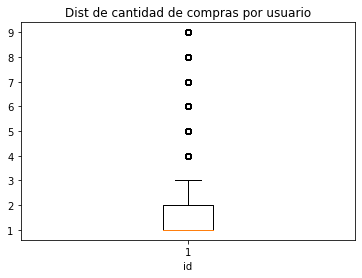

In [26]:
plt.boxplot(compras_usuario)
plt.title("Dist de cantidad de compras por usuario")
plt.xlabel("id")
plt.show()
## En un periodo de un año, la mediana de compra es de una compra.

In [27]:
#Vemos la cantidad de apariciones de estados de pagos
tp_arg_2017.order_status.value_counts()

paid                   56862
grand_total_is_zero     3163
refunded                 486
pending                  421
partially_refunded       329
partially_paid             2
Name: order_status, dtype: int64

In [28]:
#Dejamos el dataset sin grand_total_is_zero
tp_arg_2017 = tp_arg_2017.loc[tp_arg_2017['order_status'].isin(['paid', 'pending', 'refunded','partially_refunded','autorized','partially_paid'])]
#Dejamos el otro tambien
tp_h = tp_h.loc[tp_h['order_status'].isin(['paid', 'pending', 'refunded','partially_refunded','autorized','partially_paid'])]
tp_h.shape

(58100, 19)

In [29]:
#Analizamos la cantidad de apariciones por cada marca
tp_arg_2017.brand.value_counts()

importada                        20018
Stella Artois                    12344
Patagonia Brewing Co.             9619
BevyBar                           8709
Corona                            6939
Cervecería y Maltería Quilmes      471
Name: brand, dtype: int64

In [30]:
#Analizamos la cantidad de apariciones por cada categoría
tp_arg_2017.category.value_counts()

Mixed Pack      31774
Beer            19624
Merchandise      5647
Wine              678
Spirits           205
unknown           128
Home Brewing       44
Name: category, dtype: int64

In [31]:
#Aca ya queda el dataset
tp_h = tp_h.loc[tp_h['category'].isin(['Mixed Pack', 'Beer', 'Merchandise'])]
tp_arg_2017 = tp_arg_2017.loc[tp_arg_2017['category'].isin(['Mixed Pack', 'Beer', 'Merchandise'])]
tp_arg_2017.shape

(57045, 30)

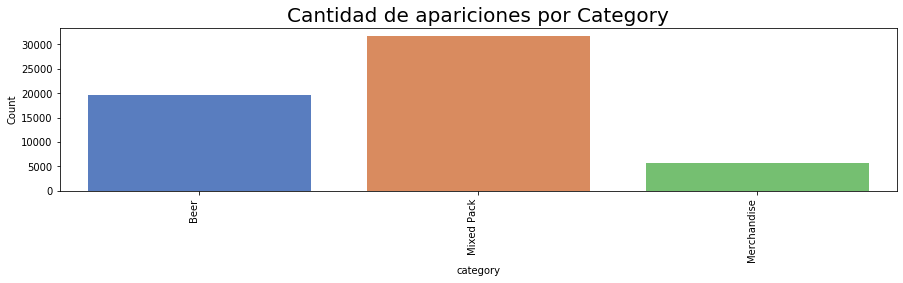

In [32]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="category",data= tp_arg_2017, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de apariciones por Category',size = 20)
plt.xlabel("category")
plt.ylabel("Count")
plt.show()

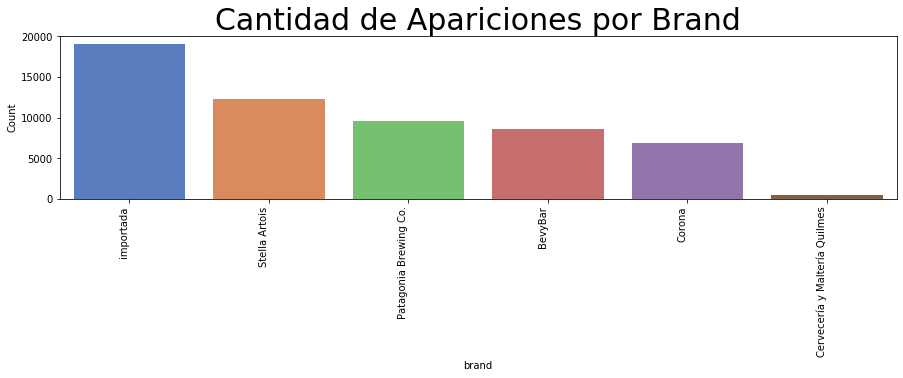

In [33]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="brand",data=tp_arg_2017, palette = "muted", order = tp_arg_2017['brand'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de Apariciones por Brand',size = 30)
plt.xlabel("brand")
plt.ylabel("Count")
plt.show()

In [34]:
#Me fijo las cantidades totales de categoría por todos los meses.
tp_pivot_cat = pd.pivot_table(data = tp_arg_2017, values = ['quantity'], index = ['month'], columns = ['category'], aggfunc= np.sum, )
tp_pivot_cat

quantity                       
category     Beer Merchandise Mixed Pack
month                                   
1            3304         687       1351
2            2810        2549       2561
3            1850        1037       2477
4            3275         380       1976
5            2092         543       4807
6            2828         800       2556
7            4004         595       3153
8            1428         334        843
9            4997        1069       3391
10           3218         447       4305
11           2354         186       5714
12           2385         120       4711

In [35]:
#Idem anterior pero por marca
tp_pivot_brand = pd.pivot_table(data = tp_arg_2017, values = ['quantity'], index = ['month'], columns = ['brand'], aggfunc= np.sum, )
tp_pivot_brand

quantity                                                             \
brand  BevyBar Cervecería y Maltería Quilmes Corona Patagonia Brewing Co.   
month                                                                       
1          255                            57    419                   953   
2          240                            92    386                   665   
3          288                            30    276                   576   
4          465                            18    639                   650   
5         1862                            37    607                  1162   
6          801                            17    624                   729   
7          732                            80   1060                  1721   
8          126                            30    246                   561   
9          161                            88   1042                  2627   
10        1608                            61   1180                  1687   
11        1531                            74   1792                  1213   
12        1564                            38   1546                   845   

                               
brand Stella Artois importada  
month                          
1              1252      2406  
2              4272      2265  
3              2598      1596  
4               964      2895  
5              1362      2412  
6              1636      2377  
7               971      3188  
8               494      1148  
9              1414      4125  
10              729      2705  
11             1749      1895  
12             1111      2112

In [36]:
#esta sería la pivot de las pivots, la idea es ver todo por mes para saber mejor la distribución
tp_pivot_two = pd.pivot_table(data = tp_arg_2017, values = ['quantity'], index = ['month'], columns = ['brand', 'category'], aggfunc= np.sum, )
tp_pivot_two

quantity                                                       \
brand     BevyBar                        Cervecería y Maltería Quilmes   
category     Beer Merchandise Mixed Pack                          Beer   
month                                                                    
1             NaN         NaN      255.0                          57.0   
2             NaN         2.0      238.0                          92.0   
3             1.0         2.0      285.0                          30.0   
4            19.0         4.0      442.0                          18.0   
5             9.0         5.0     1848.0                          14.0   
6            32.0         3.0      766.0                           3.0   
7            39.0        10.0      683.0                           3.0   
8             2.0         5.0      119.0                           8.0   
9             1.0        21.0      139.0                           NaN   
10           23.0         4.0     1581.0                           NaN   
11           14.0         8.0     1509.0                           1.0   
12            6.0         NaN     1558.0                           NaN   

                                                               \
brand                           Corona                          
category Merchandise Mixed Pack   Beer Merchandise Mixed Pack   
month                                                           
1                NaN        NaN  284.0       124.0       11.0   
2                NaN        NaN  191.0       172.0       23.0   
3                NaN        NaN   55.0        82.0      139.0   
4                NaN        NaN  192.0        56.0      391.0   
5                NaN       23.0  140.0       105.0      362.0   
6                NaN       14.0  359.0       133.0      132.0   
7               15.0       62.0  600.0       189.0      271.0   
8                2.0       20.0  136.0        87.0       23.0   
9               33.0       55.0  565.0       307.0      170.0   
10              15.0       46.0  831.0       254.0       95.0   
11              12.0       61.0  438.0        50.0     1304.0   
12               8.0       30.0  209.0        54.0     1283.0   

                                                                     \
brand    Patagonia Brewing Co.                        Stella Artois   
category                  Beer Merchandise Mixed Pack          Beer   
month                                                                 
1                        406.0       115.0      432.0         269.0   
2                        254.0        67.0      344.0         115.0   
3                        161.0        45.0      370.0          75.0   
4                        297.0        24.0      329.0          56.0   
5                        245.0        21.0      896.0          70.0   
6                        274.0        24.0      431.0         121.0   
7                        367.0        25.0     1329.0         117.0   
8                        241.0        50.0      270.0          44.0   
9                        712.0       199.0     1716.0         211.0   
10                       336.0        30.0     1321.0         145.0   
11                       283.0        31.0      899.0         217.0   
12                       213.0        29.0      603.0         148.0   

                                                                  
brand                           importada                         
category Merchandise Mixed Pack      Beer Merchandise Mixed Pack  
month                                                             
1              444.0      539.0    2288.0         4.0      114.0  
2             2306.0     1851.0    2158.0         2.0      105.0  
3              907.0     1616.0    1528.0         1.0       67.0  
4              288.0      620.0    2693.0         8.0      194.0  
5              403.0      889.0    1614.0         9.0      789.0  
6              639.0      876.0    2039.0  

In [37]:
#Hacemos 2 datasets que agrupen por, mes y día c/u, así podemos ver la variación
tp_by_month = tp_arg_2017.groupby(['month']).sum() 
tp_by_day = tp_arg_2017.groupby(['day']).sum() 

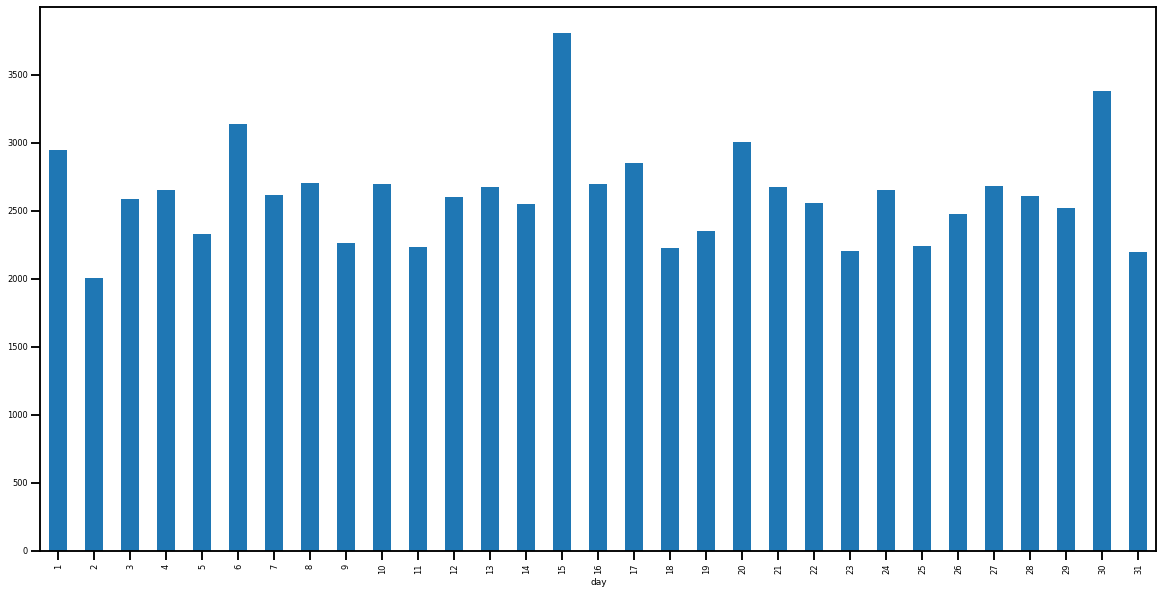

In [44]:
#Vemos los días del mes en que se dieron mayores compras
tp_by_day.quantity.plot.bar(figsize=(20,10))

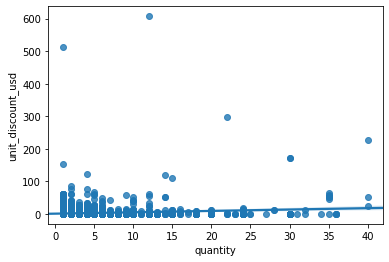

In [39]:
##VER QUE PODEMOS COMPARAR CON ESTE GRAFICO
corr = tp_arg_2017[['quantity', 'unit_discount_usd']]
corr.corr()
sns.regplot(x='quantity', y='unit_discount_usd', data= corr);

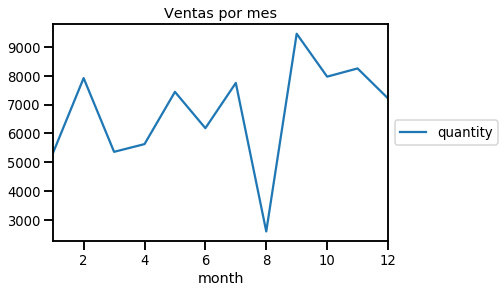

In [40]:
sns.set_context("talk", font_scale=0.8)
tp_by_month[('quantity')].plot(title = "Ventas por mes" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [47]:
#La idea ahora es ver si hay estacionalidad en algún mes con respecto a una marca (elegí las mas importantes)
#Primero filtramos por marca
tp_corona = tp_arg_2017.loc[tp_arg_2017['brand'] == 'Corona']
tp_importada = tp_arg_2017.loc[tp_arg_2017['brand'] == 'importada']
tp_Stella = tp_arg_2017.loc[tp_arg_2017['brand'] == 'Stella Artois']
tp_Patagonia = tp_arg_2017.loc[tp_arg_2017['brand'] == 'Patagonia Brewing Co.']
tp_BevyBar = tp_arg_2017.loc[tp_arg_2017['brand'] == 'BevyBar']

In [48]:
#Segundo agrupamos por mes y sumamos. Acá estaría creando varios datasets, tal vez no es necesario.
tp_BevyBar_month = tp_BevyBar.groupby(['month']).sum()
tp_Patagonia_month = tp_Patagonia.groupby(['month']).sum()
tp_importada_month = tp_importada.groupby(['month']).sum()
tp_Stella_month = tp_Stella.groupby(['month']).sum()
tp_Corona_month = tp_corona.groupby(['month']).sum()

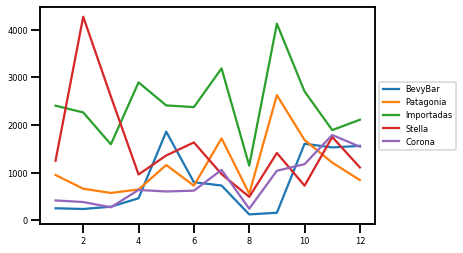

In [54]:
#visualizamos la variación por mes de cada una. Con barras tal vez quede mas lindo.
sns.set_context("talk", font_scale=0.5)
plt.plot(tp_BevyBar_month['quantity'], label='BevyBar')
plt.plot(tp_Patagonia_month['quantity'], label='Patagonia')
plt.plot(tp_importada_month['quantity'], label='Importadas')
plt.plot(tp_Stella_month['quantity'], label='Stella')
plt.plot(tp_Corona_month['quantity'], label='Corona')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [55]:
#Hacemos filtrado por categoría. Hago lo mismo que para Brand pero ahora con category.
tp_beer = tp_arg_2017.loc[tp_arg_2017['category'] == 'Beer']
tp_pack = tp_arg_2017.loc[tp_arg_2017['category'] == 'Mixed Pack']
tp_Merchandise = tp_arg_2017.loc[tp_arg_2017['category'] == 'Merchandise']

In [56]:
tp_beer_month = tp_beer.groupby(['month']).sum()
tp_Merchandise_month = tp_Merchandise.groupby(['month']).sum()
tp_pack_month = tp_pack.groupby(['month']).sum()

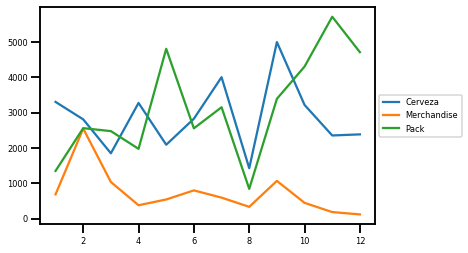

In [57]:
#visualizamos la variación por mes de cada una.
sns.set_context("talk", font_scale=0.5)
plt.plot(tp_beer_month['quantity'], label='Cerveza')
plt.plot(tp_Merchandise_month['quantity'], label='Merchandise')
plt.plot(tp_pack_month['quantity'], label='Pack')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

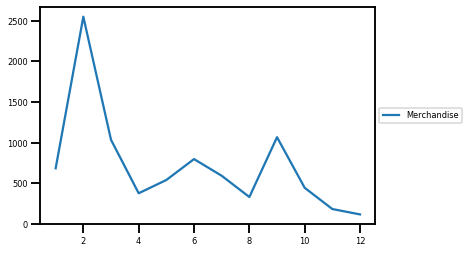

In [58]:
#Analizamos Merchandise por separado
plt.plot(tp_Merchandise_month['quantity'], label='Merchandise')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [59]:
#Acá la idea es mostrar en qué meses se gasta más
tp_by_month['unit_net_revenue_local']

month
1     1.004345e+06
2     2.329224e+06
3     1.996686e+06
4     1.824154e+06
5     3.551075e+06
6     2.214526e+06
7     2.539414e+06
8     6.847431e+05
9     2.774487e+06
10    3.729340e+06
11    5.253772e+06
12    4.599042e+06
Name: unit_net_revenue_local, dtype: float64

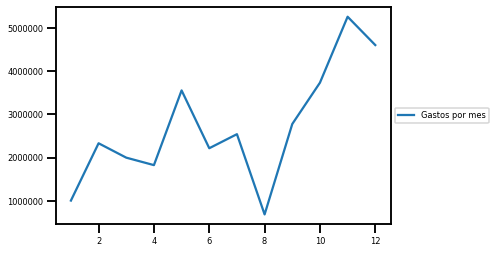

In [60]:
plt.plot(tp_by_month['unit_net_revenue_local'], label='Gastos por mes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

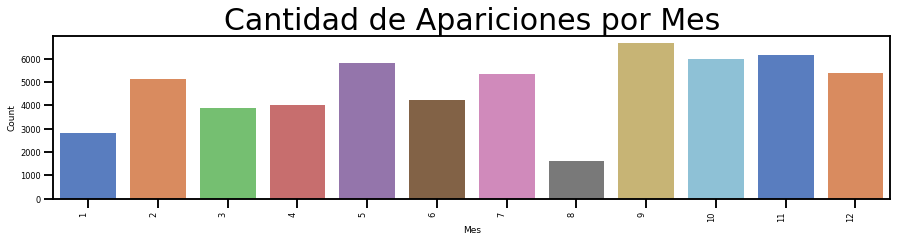

In [54]:
plt.figure(figsize=(15,3))
g = sns.countplot(x="month", data=tp_arg_2017, palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de Apariciones por Mes',size = 30)
plt.xlabel("Mes")
plt.ylabel("Count")
plt.show()

In [51]:
##Usar solo 2017?
#Ver correlacion entre compradores recurrentes y algun producto en particular
#Clusterizar los que generan compras recurrentes

In [52]:
#Borrar budweiser
#Usar solo 2017
#Juntar Bevybar y craftsociety
#Usar mas boxplot
#1° Definir 2017, las features finales finales
#2a-Regresion de 2017, predecir y comparar con enero 2018
#2-Clustering: armar el clustering y hacer un eda de los clusters
#2b
#Regresion, lineas de tiempo, etc --> Ver si podemos aplicarlo y ver si alguna marca esta creciendo, o no


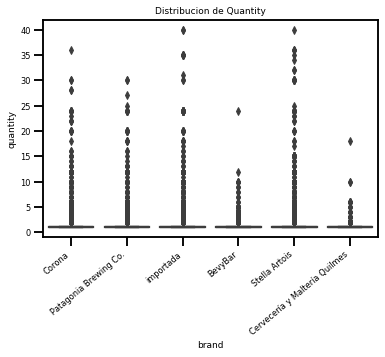

In [61]:
ay = sns.boxplot(x = tp_arg_2017.brand, y = tp_arg_2017.quantity, data = tp_arg_2017)
ay.set_xticklabels(ay.get_xticklabels(), rotation=40, ha="right")
plt.title("Distribucion de Quantity")
plt.show()

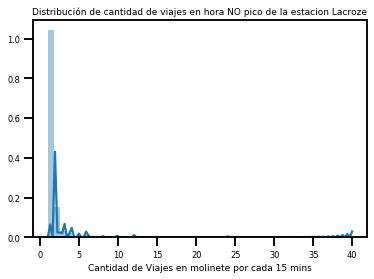

In [62]:
#VER QUE TITULOS PONEMOS EN LOS EJES
sns.distplot((tp_arg_2017['quantity']))
plt.title('Distribución de cantidad de viajes en hora NO pico de la estacion Lacroze')
plt.xlabel('Cantidad de Viajes en molinete por cada 15 mins')
plt.show()

# -----------------------------------------Clustering------------------------------------------------

In [64]:
##CLUSTERING
#Pase la order_time a int pero igual tira error asi que la saco tambien
#Limpio variables
tp_cluster = tp_h.drop(['order_time','name','id','customer_spk','country','order_date','order_status','subcategory'], axis=1)
#tp_cluster['order_time'] = pd.to_datetime(tp_cluster['order_time']).astype(np.int64)
tp_cluster1= tp_cluster.loc[tp_h['brand'].isin(['Corona', 'Patagonia Brewing Co.', 'Peñón del Águila',
       'Bass Brewery', 'Leffe', "Fuller's",
       'Spaten-Franziskaner-Bräu', 'Karlsberg Brauerei',
       'Les Brasseurs de Gayant\xa0', 'Barba Roja', 'Coopers Brewery',
       'Brouwerij Van Steenberge', 'Hoegaarden', 'Backus y Johnston',
       'Löwenbräu', 'Brauerei Beck & Co',
       'Fabricas Nacionales De Cerveza',
       'De La Vaca Tranquila Cervezas Artesanales',
       'Paulaner Brauerei München', 'Duvel Moortgat', 'Zillertal',
       'Baltika Breweries', 'Hofbräu München', 'Chimay',
       'Kronenbourg 1664', 'Czechvar', 'Kulmbacher Brauerei AG',
       'Grimbergen', 'Maredsous', 'Tsingtao',
       'Fábricas Nacionales De Cerveza',
       'Anchor Brewing Company', 'Cervecería Antares',
       'Brasserie de Silly', 'SAB Miller', 'Shock Top', 'Belsh',
       'OETTINGER Brauerei GmbH', 'Erdinger Weissbräu', 'Oranjeboom',
       'Antigua', 'Boris Biere', 'unknown', 'Corbeau Wines', 'MixxTail',
       'Skol', 'Bodega Budeguer', 'Bodega Cruz Primero', 'Bottega',
       'Condeminal', 'Fuegian Beverage Company', 'Matías Riccitelli', 'BevyBar','Stella Artois', 'Cervecería y Maltería Quilmes'])]
tp_cluster1.head(5)

,unit_discount_usd,unit_gross_revenue_local,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,brand,category,year,month,day
17162,0.0000,1030.0000,890.0,140.0000,1,788.0530,Corona,Beer,2017,9,20
17165,0.0000,631.0000,432.0,199.0000,1,493.6944,Patagonia Brewing Co.,Mixed Pack,2017,6,13
17174,2.7181,234.6542,265.0,14.7222,1,176.2018,Peñón del Águila,Beer,2017,2,28
17175,1.8052,155.8458,44.0,9.7778,4,117.0246,Peñón del Águila,Beer,2017,2,28
17176,9.0465,910.0000,1011.0,49.0000,1,698.5160,BevyBar,Mixed Pack,2017,7,30


In [65]:
#Genero dummies de brand y category
brands = pd.get_dummies(tp_cluster1.brand)
category = pd.get_dummies(tp_cluster1.category)
#concateno las tablas
tp_cluster1 = pd.concat([tp_cluster1,brands,category],axis=1)
tp_cluster1 = tp_cluster1.drop(['brand','category'], axis=1)
tp_cluster1.head(3)

,unit_discount_usd,unit_gross_revenue_local,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,year,month,day,Anchor Brewing Company,...,Shock Top,Skol,Spaten-Franziskaner-Bräu,Stella Artois,Tsingtao,Zillertal,unknown,Beer,Merchandise,Mixed Pack
17162,0.0000,1030.0000,890.0,140.0000,1,788.0530,2017,9,20,0,...,0,0,0,0,0,0,0,1,0,0
17165,0.0000,631.0000,432.0,199.0000,1,493.6944,2017,6,13,0,...,0,0,0,0,0,0,0,0,0,1
17174,2.7181,234.6542,265.0,14.7222,1,176.2018,2017,2,28,0,...,0,0,0,0,0,0,0,1,0,0


In [66]:
#AutoScaling
scaler = preprocessing.StandardScaler().fit(tp_cluster1)
xscal = scaler.transform(tp_cluster1)

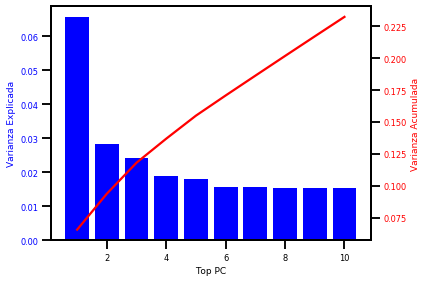

In [67]:
# Generamos el PCA
import matplotlib.cm as cm
from sklearn import decomposition

n_comps = 10
components = range(1,n_comps + 1)
pca = decomposition.PCA(n_components=n_comps)
pca.fit(xscal)
xpca = pca.transform(xscal)
eigenvalues = pca.explained_variance_ratio_
eigenvalues_acum = pca.explained_variance_ratio_.cumsum() 

#Visualizo autovalores
fig, ax1 = plt.subplots()
ax1.set_xlabel('Top PC')
ax1.set_ylabel('Varianza Explicada', color='blue')
ax1.bar(components, eigenvalues, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()  
ax2.set_ylabel('Varianza Acumulada', color='red')  
ax2.plot(components, eigenvalues_acum, color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()  
plt.show()

In [68]:
#Encontramos que con 10 PC explicamos el 90% de la varianza
#Como las primeras 4 componentes explican el 50% de la varianza utilizamos 4 dimensiones.

reduced_dim = 10
xpca_rd = xpca[:,0:reduced_dim]
kmeans_rd = KMeans(n_clusters=3, random_state=10).fit(xpca_rd)
# una vez realizado el clustering, observamos las labels de cluster asignadas a cada muestra
kmeans_rd.labels_ = kmeans_rd.labels_
kmeans_rd.labels_
# visualizamos los centroides finales de cada cluster
centers_rd = kmeans_rd.cluster_centers_
centers_rd

array([[-1.08316635e+00, -2.67584595e+00,  1.38587269e+00,
        -1.02006838e+00,  2.80533262e-02, -6.31799870e-02,
         8.81689613e-02, -8.07351876e-02,  2.25951779e-02,
        -1.33962617e-01],
       [ 1.45321057e+00, -1.70195958e-01, -4.67997903e-01,
         1.07544651e-01, -5.33738511e-02, -1.10803678e-02,
         8.31616437e-03,  4.24094393e-02, -2.53242726e-03,
         1.14249401e-02],
       [-2.11008058e+00,  1.07074861e+00,  3.74785674e-01,
         1.20051898e-01,  8.09464231e-02,  3.70823571e-02,
        -3.98066688e-02, -4.71428863e-02, -2.40816358e-03,
         2.02755399e-02]])

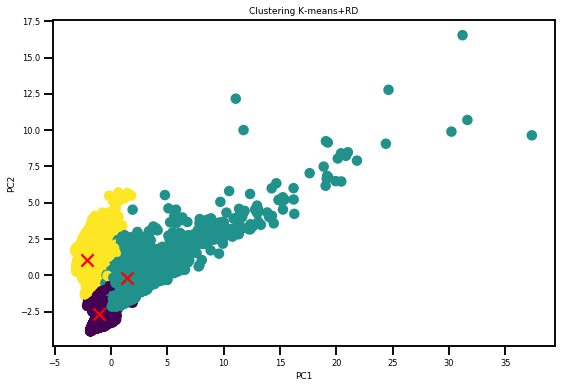

In [69]:
# K-Means + RD (Con las 3 primeras PC)
plt.figure(figsize=(9,6))
plt.scatter(xpca_rd[:,0],xpca_rd[:,1],c=kmeans_rd.labels_.astype(float))
plt.scatter(centers_rd[:,0], centers_rd[:,1], marker="x", color='r',s=150)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering K-means+RD')
plt.show()

In [75]:
sill_score_rd = silhouette_score(xpca,kmeans_rd.labels_)
print(sill_score_rd)

0.26419527130555576


In [76]:
#Con 4 PC y 5 clusters obtenemos un silhouette de 48%
#Con 4 PC y 5 clusters obtenemos un silhouette de 44%
#Con 3 PC y 3 clusters obtenemos un silhouette de 49%
#Esto daba antes, ahora no se porque da menos, la concha de la gorra, 

In [77]:
#Clustering de importadas
tp_importadas = tp_cluster.loc[tp_arg['brand'].isin(['Cervecería Antares','Flensburger Brauerei', 'Cerveceria Artesanal El Bolson', 'Peñón del Águila', 'Leffe', 'Spaten-Franziskaner-Bräu', 'BBC', 'Cervecería Artesanal El Bolson',
       'Anchor Brewing Company', 'Bass Brewery', 'Hofbräu München',
       'Adnams', "Fuller's", 'Karlsberg Brauerei',
       'Les Brasseurs de Gayant\xa0',
       'Brouwerij Van Steenberge', 'Hoegaarden',
       'De La Vaca Tranquila Cervezas Artesanales', 'Tsingtao',
       'Löwenbräu', 'Coopers Brewery',
       'Backus y Johnston', 'Brauerei Beck & Co', 'MixxTail', 'Shock Top',
       'Bogotá Beer Company',
       'Czechvar', 'Belle-Vue', 'Paulaner Brauerei München',
       'Duvel Moortgat', 'Zillertal', 'Baltika Breweries', 'Chimay',
       'Kronenbourg 1664', 'Kulmbacher Brauerei AG', 'Grimbergen',
       'Maredsous',
       'franziskaner','Erdinger Weissbräu',
       'SAB Miller'
       'Belsh', 'OETTINGER Brauerei GmbH', 'Hertog Jan',
       'Finca Ferrer', 'Oranjeboom','Corbeau Wines', 'Boddingtons', 'Bombay', 'Jägermeister',
       'Harvierstoun', 'Weidmann',
       "Jack Daniel's", 'Brahma',
       'Príncipe de los Apóstoles','SKYY', 'Jameson','Campari'])]

In [78]:
tp_importadas.shape

(18146, 11)

In [79]:
#Genero dummies de brand
brands_i = pd.get_dummies(tp_importadas.brand)
category_i = pd.get_dummies(tp_importadas.category)
tp_cluster2 = pd.concat([tp_importadas,brands_i,category_i],axis=1)
tp_cluster2 = tp_cluster2.drop(['brand','category'], axis=1)
tp_cluster2.head(3)

,unit_discount_usd,unit_gross_revenue_local,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,year,month,day,Anchor Brewing Company,...,Oranjeboom,Paulaner Brauerei München,Peñón del Águila,Shock Top,Spaten-Franziskaner-Bräu,Tsingtao,Zillertal,Beer,Merchandise,Mixed Pack
17174,2.7181,234.6542,265.0,14.7222,1,176.2018,2017,2,28,0,...,0,0,1,0,0,0,0,1,0,0
17175,1.8052,155.8458,44.0,9.7778,4,117.0246,2017,2,28,0,...,0,0,1,0,0,0,0,1,0,0
17177,2.7181,234.6542,265.0,14.7222,1,176.2018,2017,2,28,0,...,0,0,1,0,0,0,0,1,0,0


In [83]:
tp_cluster2 = tp_cluster1.drop(['country','id','unit_gross_revenue_usd','order_time','order_date','order_status', 'source_system_order_id', 'rate_local_do_usd', 'order_days_after_first_order', 'unit_price_charged_usd', 'unit_discount_usd', 'customer_first_order_date', 'unit_delivery_charged_usd', 'unit_net_revenue_usd', 'row_created_at', 'sku', 'date_created'], axis=1)
tp_cluster2.head(5)

KeyError: "['country' 'id' 'unit_gross_revenue_usd' 'order_time' 'order_date'\n 'order_status' 'source_system_order_id' 'rate_local_do_usd'\n 'order_days_after_first_order' 'unit_price_charged_usd'\n 'customer_first_order_date' 'unit_delivery_charged_usd'\n 'unit_net_revenue_usd' 'row_created_at' 'sku' 'date_created'] not found in axis"

In [84]:
#AutoScaling
scaler_impo = preprocessing.StandardScaler().fit(tp_cluster2)
##Hacer clustering sobre este xscal
xscal_impo = scaler_impo.transform(tp_cluster2)
#PCA sobre los clusters para visualizarlo
#Crear 3 datasets por las etiquetas de los clusters y hacer un displot o boxplot de alguna de las variables


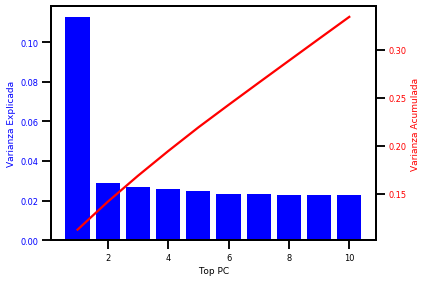

In [85]:
# Generamos el PCA

n_comps = 10
components = range(1,n_comps + 1)
pca_impo = decomposition.PCA(n_components=n_comps)
pca_impo.fit(xscal_impo)
xpca_impor = pca_impo.transform(xscal_impo)
eigenvalues_impo = pca_impo.explained_variance_ratio_
eigenvalues_acum_impo = pca_impo.explained_variance_ratio_.cumsum() 

#Visualizo autovalores
fig, ax1 = plt.subplots()
ax1.set_xlabel('Top PC')
ax1.set_ylabel('Varianza Explicada', color='blue')
ax1.bar(components, eigenvalues_impo, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()  
ax2.set_ylabel('Varianza Acumulada', color='red')  
ax2.plot(components, eigenvalues_acum_impo, color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()  
plt.show()

In [86]:
#Encontramos que con 2 PC explicamos el 60% de la varianza CORREGIR ESTO
reduced_dim = 2
xpca_rd_impo = xpca_impor[:,0:reduced_dim]
kmeans_rd_impo = KMeans(n_clusters=4, random_state=10).fit(xpca_rd_impo)
# una vez realizado el clustering, observamos las labels de cluster asignadas a cada muestra
kmeans_rd_impo.labels_ = kmeans_rd_impo.labels_
kmeans_rd_impo.labels_
##Concatenar las labels a cada sample

array([1, 1, 1, ..., 1, 1, 1])

In [87]:
# visualizamos los centroides finales de cada cluster
centers_rd_impo = kmeans_rd_impo.cluster_centers_
centers_rd_impo

array([[-0.77631791,  1.03861816],
       [-1.33966389, -0.38162277],
       [ 4.21939018, -1.81108598],
       [ 3.24212066,  0.848278  ]])

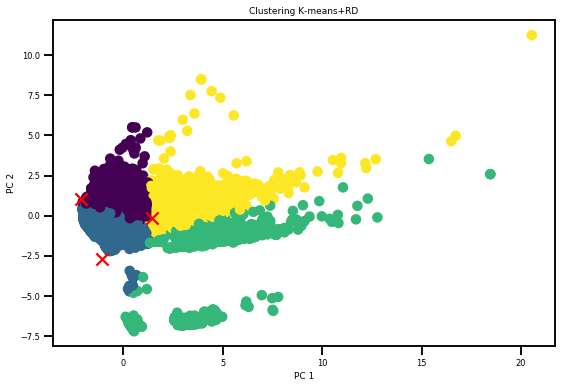

In [88]:
# K-Means + RD (Con las 2 primeras PC)
plt.figure(figsize=(9,6))
plt.scatter(xpca_rd_impo[:,0],xpca_rd_impo[:,1],c=kmeans_rd_impo.labels_.astype(float))
plt.scatter(centers_rd[:,0], centers_rd[:,1], marker="x", color='r',s=150)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering K-means+RD')
plt.show()

In [101]:
sill_score_rd = silhouette_score(xpca_rd_impo,kmeans_rd_impo.labels_)
print(sill_score_rd)

0.44115462852001425


In [102]:
#Haciendo clustering con las importadas encontramos distribuciones
#similares a las vistas solo para las marcas core de negocio, pero con un Silhouette mucho mas alto
#OJO QUE USE LAS MISMAS VARIABLES, DEL SCALER EN ADELANTE QUEDAN LAS DE LA SEGUNDA PARTE

In [103]:
##Notas Martin
##Buscar borrar el id que haya hecho compras ENOOORMES que genere los outliers
##Dejar el EDA como ya esta, ponerle foco a clustering
##Hacer el clustering sobre los datos auto-escalados
##Crear 3 ( o los que sean) datasets por las etiquetas de los clusters (##Concatenar las labels a cada sample) y hacer un displot o boxplot de alguna de las variables (quantity, price)
##Si alcanza el tiempo (Aplicar PCA sobre los clusters para visualizar las componentes y blabla)

In [104]:
##Agrego las labels al tp_importadas
tp_importadas ['labels'] = kmeans_rd_impo.labels_

C:\Users\Usuario\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [105]:
tp_importadas['labels'].value_counts()

1    9811
0    3821
3    2995
2    1519
Name: labels, dtype: int64

In [106]:
tp_nacional = tp_cluster.loc[tp_h['brand'].isin(['Corona', 'Patagonia Brewing Co.', 'BevyBar',
       'Stella Artois', 'Cervecería y Maltería Quilmes'])]

In [107]:
brandsnac = pd.get_dummies(tp_nacional.brand)
category = pd.get_dummies(tp_nacional.category)
tp_nac = pd.concat([tp_nacional,brandsnac,category],axis=1)
tp_nac = tp_nac.drop(['brand','category'], axis=1)
tp_nac.head(3)

,unit_discount_usd,unit_gross_revenue_local,unit_price_charged_local,unit_delivery_charged_local,quantity,unit_net_revenue_local,year,month,day,BevyBar,Cervecería y Maltería Quilmes,Corona,Patagonia Brewing Co.,Stella Artois,Beer,Merchandise,Mixed Pack
17162,0.0000,1030.0,890.0,140.0,1,788.0530,2017,9,20,0,0,1,0,0,1,0,0
17165,0.0000,631.0,432.0,199.0,1,493.6944,2017,6,13,0,0,0,1,0,0,0,1
17176,9.0465,910.0,1011.0,49.0,1,698.5160,2017,7,30,1,0,0,0,0,0,0,1


In [108]:
#AutoScaling
scaler_nac = preprocessing.StandardScaler().fit(tp_nac)
xscal_nac = scaler_nac.transform(tp_nac)

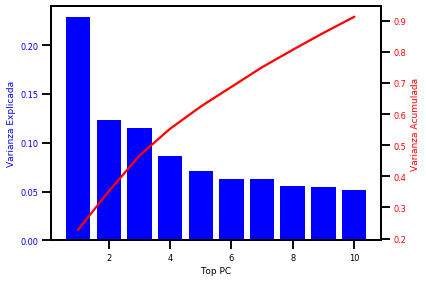

In [109]:
n_comps = 10
components = range(1,n_comps + 1)
pca_nac = decomposition.PCA(n_components=n_comps)
pca_nac.fit(xscal_nac)
xpca_nac = pca_nac.transform(xscal_nac)
eigenvalues_nac = pca_nac.explained_variance_ratio_
eigenvalues_acum_nac = pca_nac.explained_variance_ratio_.cumsum() 

#Visualizo autovalores
fig, ax1 = plt.subplots()
ax1.set_xlabel('Top PC')
ax1.set_ylabel('Varianza Explicada', color='blue')
ax1.bar(components, eigenvalues_nac, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()  
ax2.set_ylabel('Varianza Acumulada', color='red')  
ax2.plot(components, eigenvalues_acum_nac, color='red')
ax2.tick_params(axis='y', labelcolor='red')
fig.tight_layout()  
plt.show()

In [110]:
#Encontramos que con 3 PC explicamos el 50% de la varianza
reduced_dim_nac = 3
xpca_rd_nac = xpca_nac[:,0:reduced_dim_nac]
kmeans_rd_nac = KMeans(n_clusters=3, random_state=10).fit(xpca_rd_nac)
# una vez realizado el clustering, observamos las labels de cluster asignadas a cada muestra
kmeans_rd_nac.labels_ = kmeans_rd_nac.labels_
kmeans_rd_nac.labels_
##Concatenar las labels a cada sample

array([1, 0, 0, ..., 1, 1, 1])

In [111]:
# visualizamos los centroides finales de cada cluster
centers_rd_nac = kmeans_rd_nac.cluster_centers_
centers_rd_nac

array([[ 0.57737723, -0.60466939,  0.07413757],
       [-2.12962663,  1.45077728, -0.27084744],
       [ 8.77540638,  4.14559592,  1.08222797]])

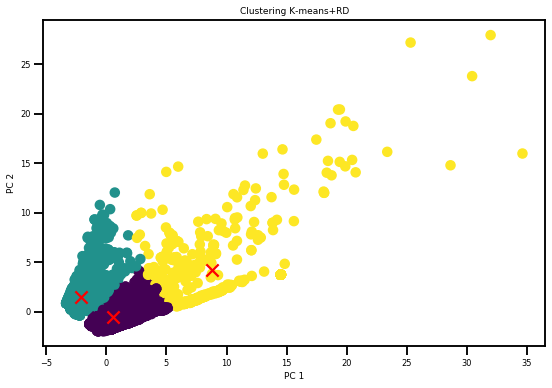

In [112]:
# K-Means + RD (Con las 3 primeras PC)
plt.figure(figsize=(9,6))
plt.scatter(xpca_rd_nac[:,0],xpca_rd_nac[:,1],c=kmeans_rd_nac.labels_.astype(float))
plt.scatter(centers_rd_nac[:,0], centers_rd_nac[:,1], marker="x", color='r',s=150)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustering K-means+RD')
plt.show()

In [113]:
sill_score_rd = silhouette_score(xpca_rd_nac,kmeans_rd_nac.labels_)
print(sill_score_rd)

0.4814453697923065


In [163]:
tp_nacional['labels'] = kmeans_rd_nac.labels_
tp_nacional.labels.value_counts()

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    27544
1     9837
2      575
Name: labels, dtype: int64

## EDA de los Clusters encontrados

In [164]:
#Hago EDA de lo nacional
tp_nac_0 = tp_nacional.loc[tp_nacional['labels'].isin(['0'])]
tp_nac_1 = tp_nacional.loc[tp_nacional['labels'].isin(['1'])]
tp_nac_2 = tp_nacional.loc[tp_nacional['labels'].isin(['2'])]

In [165]:
tp_nac_0.isnull().sum()
tp_nac_1.isnull().sum()
tp_nac_2.isnull().sum()

unit_discount_usd              0
unit_gross_revenue_local       0
unit_price_charged_local       0
unit_delivery_charged_local    0
quantity                       0
unit_net_revenue_local         0
brand                          0
category                       0
year                           0
month                          0
day                            0
labels                         0
dtype: int64

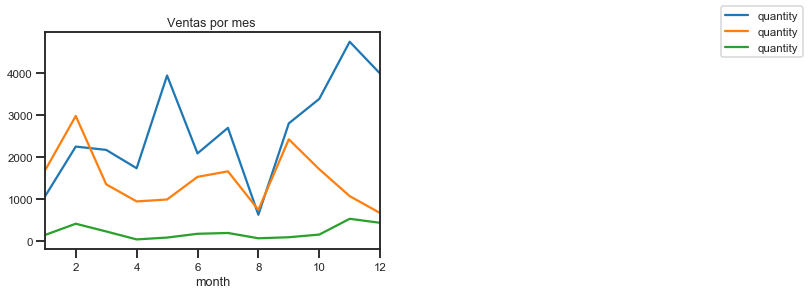

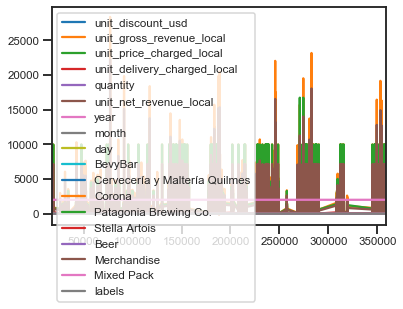

In [186]:
sns.set_context("talk", font_scale=0.7)
tp_nac_0.groupby(['month']).sum()[('quantity')].plot(title = "Ventas por mes " )
tp_nac_1.groupby(['month']).sum()[('quantity')].plot(title = "Ventas por mes " )
tp_nac_2.groupby(['month']).sum()[('quantity')].plot(title = "Ventas por mes " )
plt.legend(loc='center left', bbox_to_anchor=(2, 1))
plt.show()
tp_nac.plot()

In [193]:
tp_pivot_nac = pd.pivot_table(data = tp_nacional, values = ['quantity'], index = ['labels'], columns = ['category'], aggfunc= np.sum, )
tp_pivot_nac

quantity                       
category     Beer Merchandise Mixed Pack
labels                                  
0            74.0         NaN    31470.0
1          9573.0      8252.0        NaN
2           102.0       284.0     2258.0

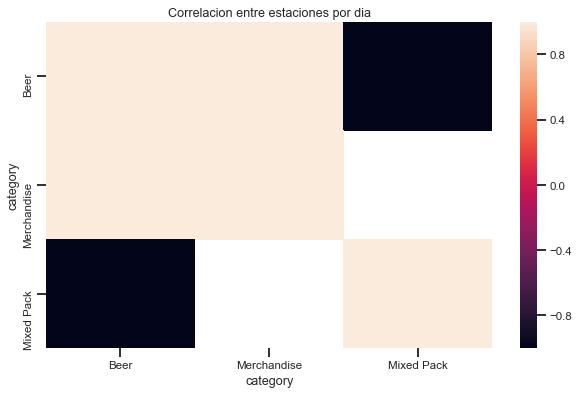

In [194]:
plt.figure(figsize=(10,6))
sns.heatmap(tp_pivot_nac.quantity.corr())
plt.title("Correlacion entre estaciones por dia")
plt.show()

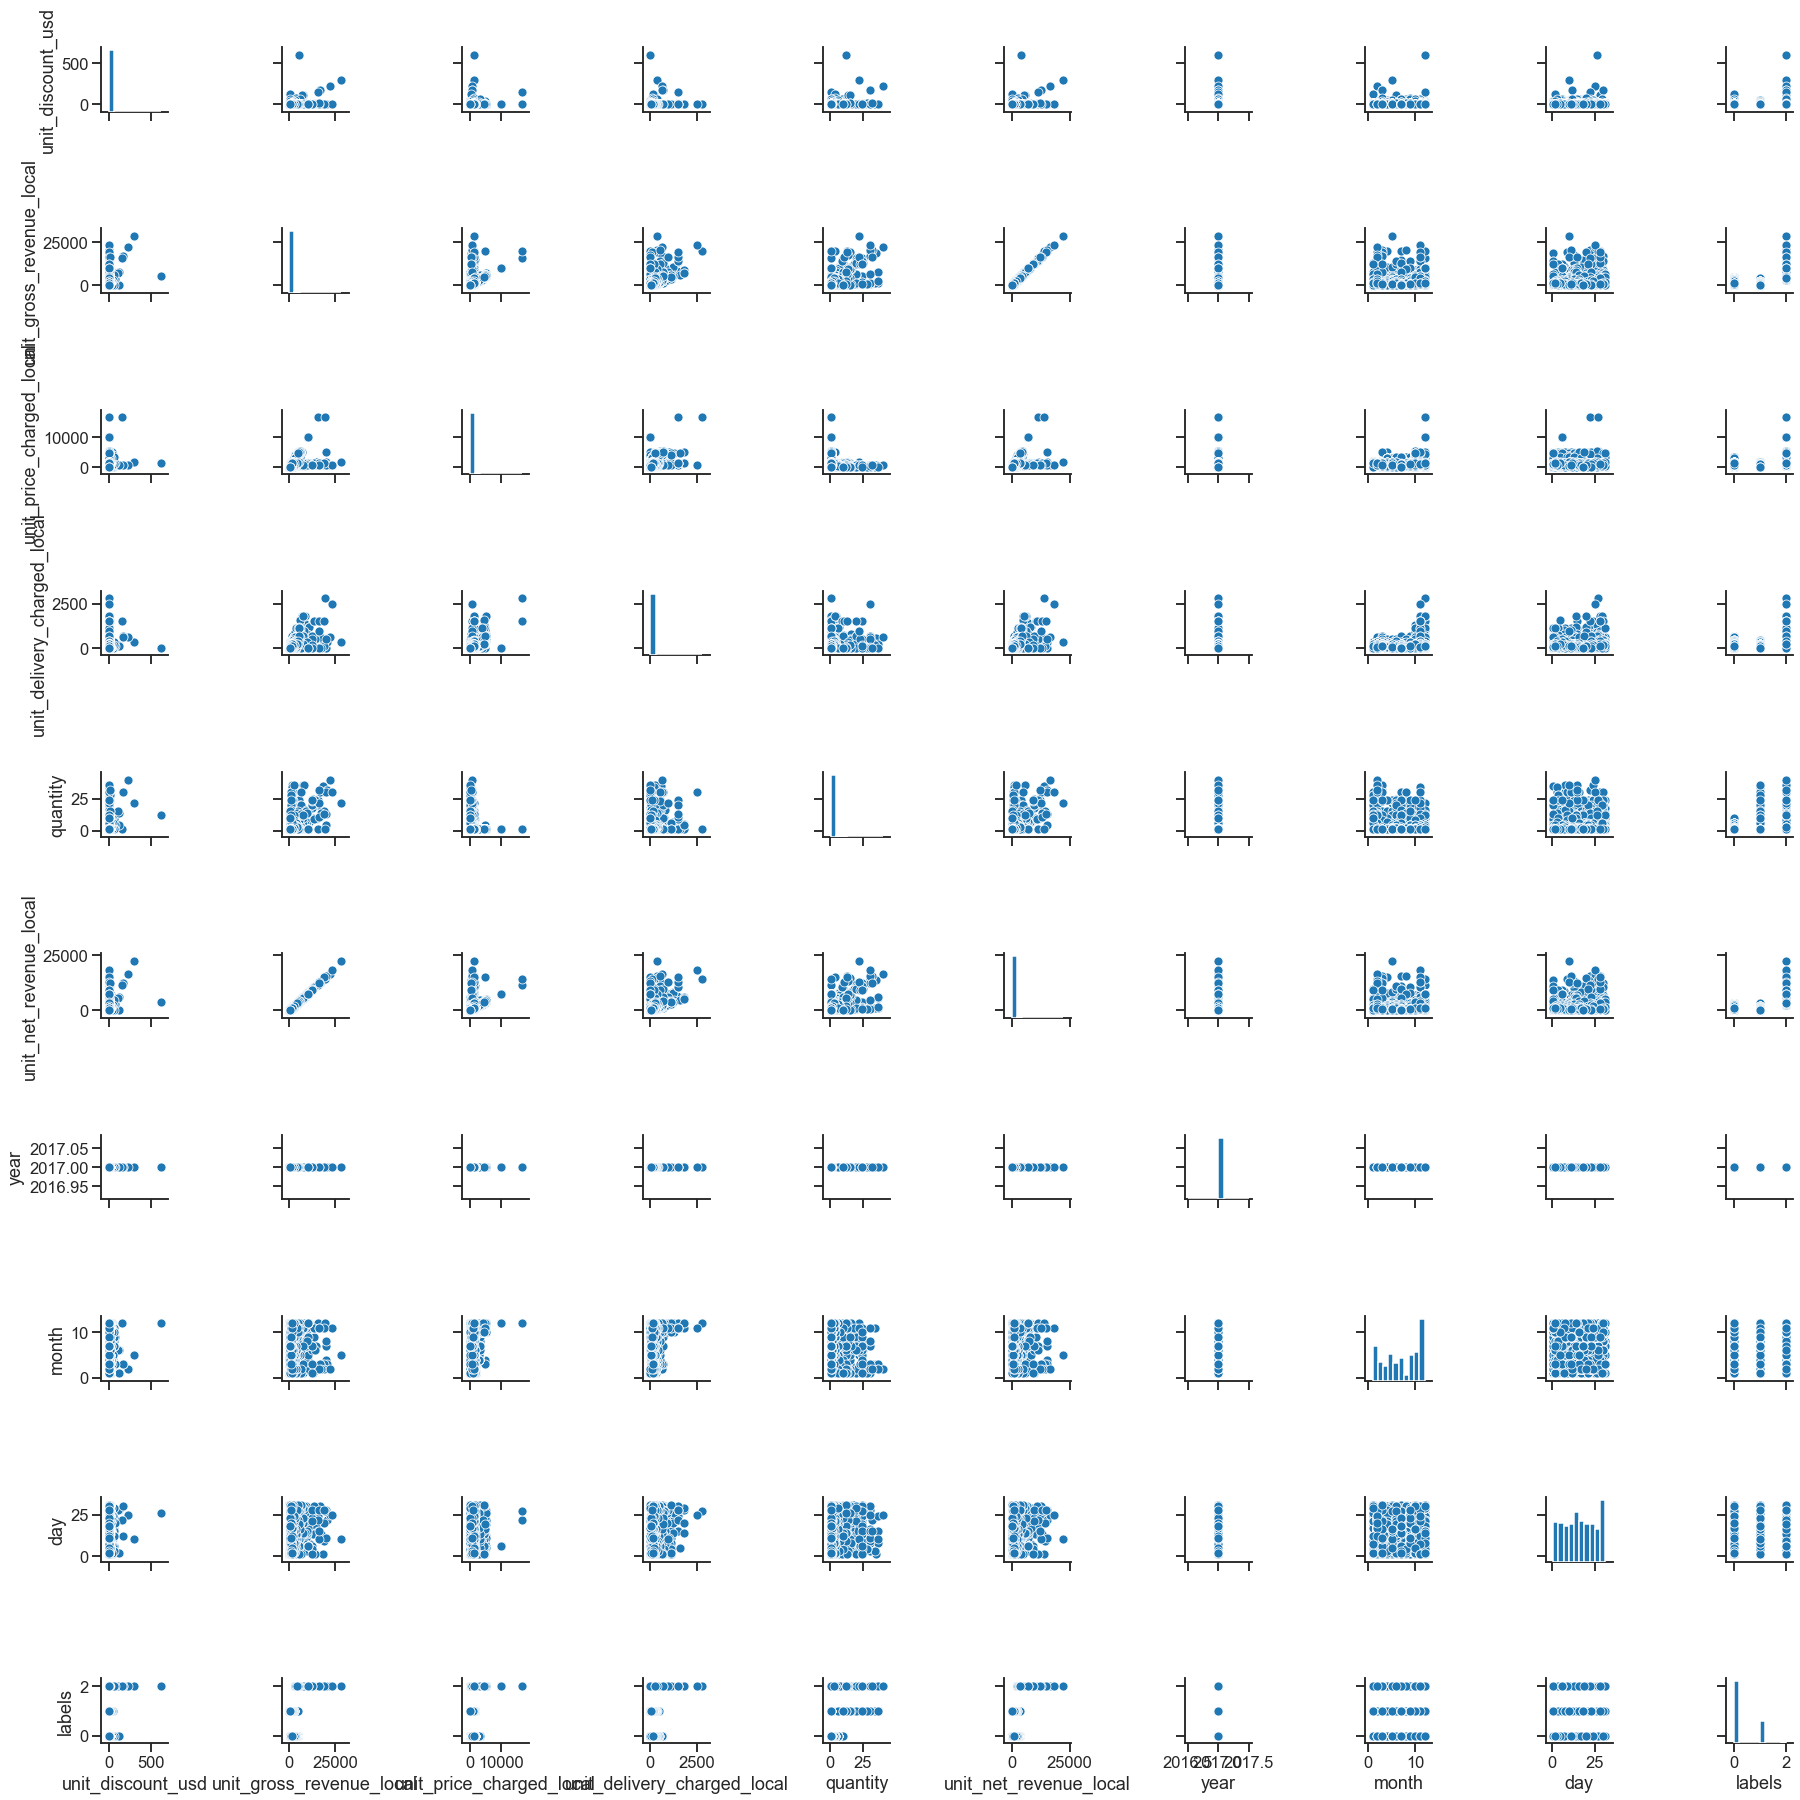

In [173]:
sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.pairplot(tp_nacional)
plt.show()